### Combining data sets

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

One of the key tasks in data science is combining infomation from two sources, for example adding gene expression data from two RNASeq experiments, combining protein annotations and structural data, or adding taxonomy to species distribution data.  Pandas has several ways to do this.  You've used a basic concatenation to add dataframes together in Class 3, but there are much more sophisticated ways of combining data.

To discuss joining dataframes we need a bit of vocabulary.  If we have two dataframes with some overlap in what they cover:  

Adding all the data together - Full outer join.   
Just outputing the overlap - Inner join.  
Adding the overlap to one of the dataframes - left or right join.  


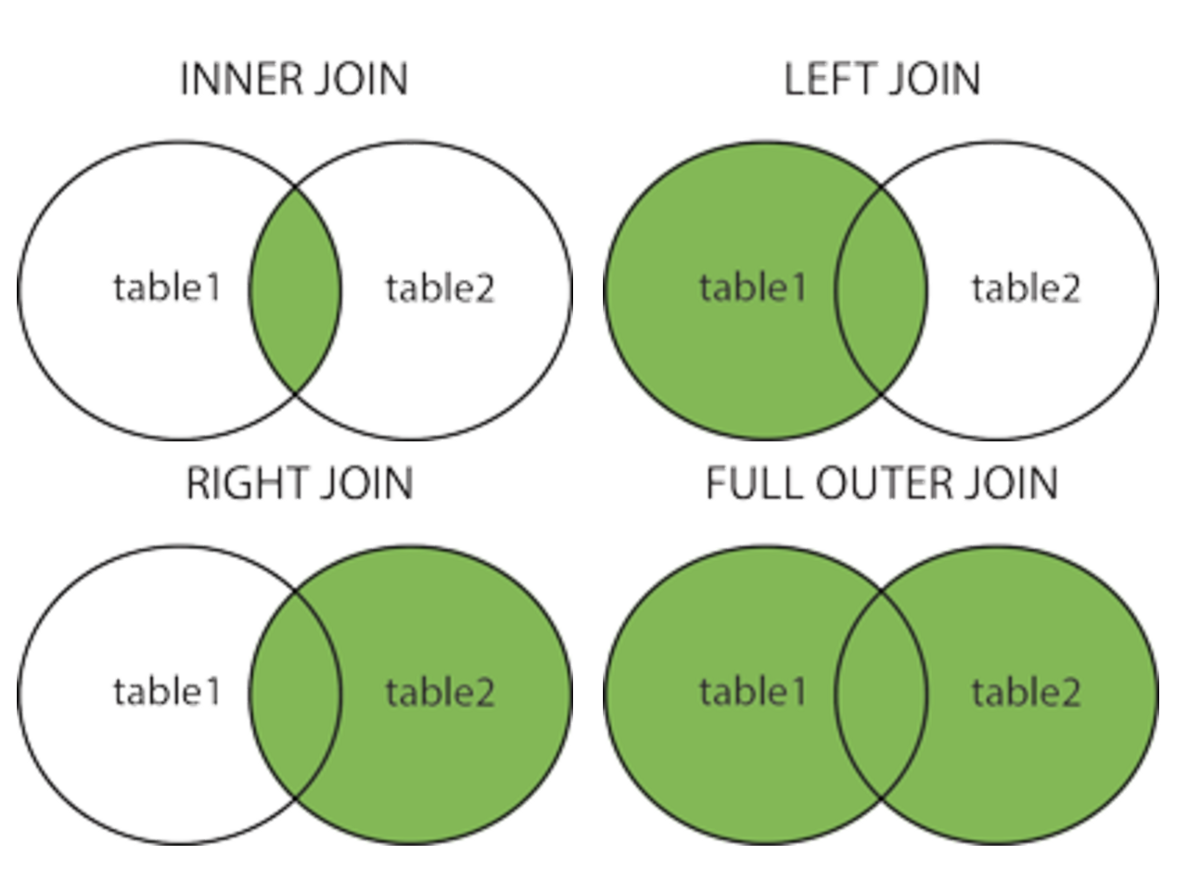

There are three ways of combiing dataframes in pandas

concat() - combine DataFrames across rows or columns  
merge() - combine dataframes on a common columns or index  
join() - combine dataframes on a key column or an index  

Here's some datasets to illulstrate these methods.  We have results from RNASeq runs on infected and control organisms, the location and sizes of genes, annotations for genes.  Read them all in.

    Infected.csv
    Control.csv
    Location.csv
    anot.csv

Concatenate the infected and control dataframes.  

 Use pd.concat
 
     pd.concat([list_of_files], axis = 0)
     

Add an index to note where the data came from using 'keys':

    keys=["infected", "control"]
    
Check the different effects of axis as 0 (pasting rows) and axis as 1 (pasting columns)

#### Looking at inner and outer joins  

Check the behaviour of specifying inner and outer joins

    join="inner"

This standard join is  joining on the index numbers.  To create a more useful join we either make the gene names indexes  

    df.set_index('Transcript')
    
Or specify which column should be used, and use merge or join.  Try both ways.

    result1 = pd.concat([control.set_index('Transcript'), infected.set_index('Transcript')], axis=1, join="inner",keys=[ "control", "infected",])
    
    result2 = control.merge(infected, on ='Transcript', how = 'outer', suffixes=("_Control", "_Infected"))
    
    result3 = control.merge(infected, on ='Transcript', how = 'left', suffixes=("_Control", "_Infected"))


We can use merge to join df without a column name in commmon (such as location and anot by specifiying which columns to join on  

    left_on ='Locus', right_on = 'Gene'

See how pandas has dealt with the column which has the same name in both df, but contains different values.

How is join different?

df.merge joins on common columns  by default and gives an inner join  
df.join joins on indexes by default and gives an outer join

Check both ways.

    control.merge(infected, on ='Transcript', suffixes=("_Control", "_Infected"))
    control.join(infected, lsuffix='_Control', rsuffix='_Infected')

or better, set the index as "Transcript".  In the join command above replace 'control' with 
    
    control.set_index('Transcript')
    
and infected with

    infected.set_index('Transcript')

Join the gene expression data (control and infected) to the annotations and to the location of each gene.  Use   

    df.head(3) 
  
to check the form of each dataframe, and use

    df.merge()
  
to combine them.  You can chain merge commands:

    df4 =  df1.merge().merge()
    
You can specify which column to merge on in right and left df using  

    left_on ='Column1', right_on = 'Column2'

We'll return to the greenland chick data from week 2 and add in climate data for each location.
Read the data in from:  

    Greenland_nests.csv
    Greenland_climate.csv

The dataframes don't quite overlap.  We have chick data but no climate data for Disko Bay and climate data but no chick data for Ilulissat.
Join the two datasets together.  'Nesting Site' is the same as 'Town' 

To join these as we'd wish we need to specify which column is the key - the shared infomation - and how much of the rest of the infomation we want to keep.   merge is a better choice here than concat or join.  Aim for the following format.  You can replace Na with whatever you want using:  

    .fillna({"Column_name": "replacement for NaNa"})

### Some subsetting practice:

Make the town the index

Select all Nuuk data by name of row and by location of row (remember python is 0-indexed)

Print all rainfall data by name of column and then by location of column.  
To call a column you need the form df.loc[:, "column name"], ":" means "for all rows.

Print the average rainfall for Nuuk

Print the average rainfall and sunshine for Nuuk.  
Put the two column names in list format.

Print the average rainfall and sunshine for Nuuk and Tasiilaq.  

Instead of using lists of column or row names we can slice adjacent columns or rows using:  

    df.iloc[1:3, 0:5]

Check to see you know how python is using the iloc positons.  Do you always get the return you expect?

We can also use .iloc to get the last column:  
    
    df.iloc[:, -1]
    
or the last three rows:  
    
    df.iloc[[-1, -2, -3]]

### Conditional splitting  
So far we've split the dataframe based on locations or labels.  We can also split on cell values (as you did in week 2).  Make a new dataframe with just the rows where the rainfall is over 500mm per year.  

If you use the form:

    df['column name'] > value. 
    
You get a boolean 'mask' listing true or false for each case.  You need to apply this to the dataframe and assign the output to a new dataframe:

    new_df = df[FILTER]
    
Check the output of  

    df['Av rainfall (mm)'] > 500
    
And apply this filter to the dataframe to generate a subsetted dataframe

#### Practise with splitting dataframes

Make a new dataframe for the west coast data

Divide the dataframe into climate and nest data sets

Divide the dataframe into data for rainy (>500mm per year) and dry (<500mm per year) dataframes

Make a new dataframe with east and rainy locations.  "&" is the operator to add between the two conditions

### Groups and multi-indexes

Another way of subsetting a dataframe is to produce a summary by groups.  Make a tidy df of the infection RNASSeq data with columns:

Disease_state, Replicate, Gene, Function, Pathway, TPM

There are lots of ways you could do this.  Try the approach from class 3 with similar data.

### Summary by pivot_table

We can also use pivot_table.  In class3 we used pivot this to make data wide form again.  pivot_table is a numeric approach to the same things which allows you to aggregate data.
You can summarise by the groups giving mean, min, max, mode, sd

    aggfunc=np.sum  
    aggfunc=np.mean  
    aggfunc=np.max  
    aggfunc=np.min  
    aggfunc=np.sum  
    aggfunc=np.std   


Put the dataframe back into wide form using pd.pivot_table, and reporting the mean TPM.

index should be 'Disease'  
columns should be 'Gene'  
values should be 'TPM'  

We can tidy this using .T to transpose the df and .round(1) to reduce the number of decimal plances shown

output maximum values instead 

    aggfunc=np.max

We can specify two or more aggregates.  

    aggfunc=('mean', 'std')
    
Gives mean and standard error

Re-arrange this table to give a row of means and a row of standard deviations for control and infected for each gene

re-set the index  

    .reset_index() 

use pivot and transpose